# Analiza wrażliwości

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from simulation import run_simulation

%matplotlib inline

In [48]:
n_simulations = 1000

## Ile klenerów zatrudnić

In [23]:
max_male = 10
max_female = 10

male_bartenders = np.arange(0, max_male+1)
female_bartenders = np.arange(0, max_female+1)
bartender_results = np.zeros((max_male+1, max_female+1))

for i in range(bartender_results.shape[0]):
    for j in range(bartender_results.shape[1]):
        # creating unique combination of male and female bartenders
        barternders = [False] * male_bartenders[i] + [True] * female_bartenders[j]
        #running simulation
        results, _ = run_simulation(n_simulations=n_simulations, bartenders=barternders)
        
        #appending results
        bartender_results[i, j] = results.mean()

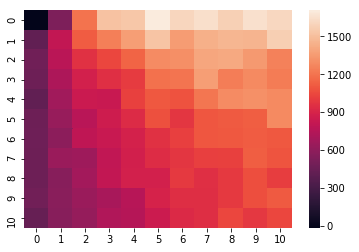

In [35]:
ax = sns.heatmap(bartender_results)
plt.show()

## Jaka strategia cenowa

In [41]:
results_expensive, _ = run_simulation(n_simulations=n_simulations, drink_price=4, patience_threshold=10)
results_cheap, _ = run_simulation(n_simulations=n_simulations)
results_super_cheap, _ = run_simulation(
    n_simulations=n_simulations,
    drink_price=1,
    patience_threshold=20,
    customer_lambda=10)

In [44]:
print("średnia:")
print("droższe drinki: " + str(results_expensive.mean()))
print("tańsze drinki: " + str(results_cheap.mean()))
print("super tanie drinki: " + str(results_super_cheap.mean()))

print("\nodchylenie:")
print("droższe drinki: " + str(results_expensive.std()))
print("tańsze drinki: " + str(results_cheap.std()))
print("super tanie drinki: " + str(results_super_cheap.std()))

średnia:
droższe drinki: 1300.9178652531587
tańsze drinki: 818.3555038197655
super tanie drinki: 743.5231906176626

odchylenie:
droższe drinki: 446.13103980807307
tańsze drinki: 304.8251123372854
super tanie drinki: 325.44451323692346


<Figure size 1440x720 with 0 Axes>

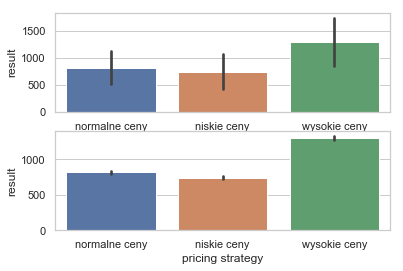

In [73]:
plt.figure(figsize=(20,10))
f, axes = plt.subplots(2, 1)
sns.set(style="whitegrid")
df_to_plot = pd.DataFrame(
    {
        "pricing strategy": 
            ["normalne ceny"] * n_simulations + 
            ["niskie ceny"] * n_simulations + 
            ["wysokie ceny"] * n_simulations,
        "result": np.concatenate((results_cheap, results_super_cheap, results_expensive), axis=0)
    }
)
ax = sns.barplot(x="pricing strategy", y="result", data=df_to_plot, ci="sd", ax=axes[0]) # standard diviation
ax = sns.barplot(x="pricing strategy", y="result", data=df_to_plot, ci=95, ax=axes[1]) # some bootstrap :D

## Zatrudnianie ładniejszych kelnerek

In [78]:
results_normal, _ = run_simulation(n_simulations=n_simulations)
results_beautiful, _ = run_simulation(n_simulations=n_simulations, flirt_time=25, avg_tip=10)

<Figure size 1440x720 with 0 Axes>

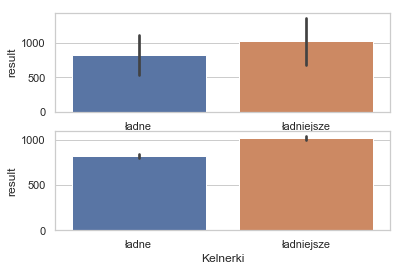

In [79]:
plt.figure(figsize=(20,10))
f, axes = plt.subplots(2, 1)
sns.set(style="whitegrid")
df_to_plot = pd.DataFrame(
    {
        "Kelnerki": 
            ["ładne"] * n_simulations + ["ładniejsze"] * n_simulations,
        "result": np.concatenate((results_normal, results_beautiful), axis=0)
    }
)
ax = sns.barplot(x="Kelnerki", y="result", data=df_to_plot, ci="sd", ax=axes[0]) # standard diviation
ax = sns.barplot(x="Kelnerki", y="result", data=df_to_plot, ci=95, ax=axes[1]) # some bootstrap :D

## Zajęcie w kolejce

In [96]:
import tqdm
patience_results = np.zeros(11)

for patience in tqdm.tqdm(range(len(patience_results))):
    results, _ = run_simulation(n_simulations=int(n_simulations), patience_threshold=patience)
    patience_results[patience] = results.mean()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [13:59<00:00,  7.27s/it]


In [94]:
patience_results

array([417.77240116, 479.67273794, 489.89341046, 535.9284584 ,
       612.59060205, 846.43784678, 779.6800078 , 836.93185531,
       846.52292517, 802.23991878, 800.65581631, 802.70304899,
       813.12297707, 815.95082489, 812.90896058, 756.88519858,
       800.57119127, 789.57723694, 851.00352339, 840.52808297,
       823.8206992 , 846.35519858, 861.55550449, 778.57451691,
       778.63483598, 816.63686138, 821.64889491, 790.47714683,
       872.14102774, 790.73585333, 805.31527716, 819.1876719 ,
       816.59863822, 802.56942669, 807.27510251, 809.52025299,
       811.75067427, 750.01485421, 813.44171891, 798.18758677,
       813.11265158, 809.68087861, 816.60557331, 763.53089458,
       798.48280343, 814.52312456, 809.10541323, 802.74282476,
       807.19142128, 815.09972655, 819.94401828, 799.81689221,
       807.35952783, 815.5605055 , 821.04133777, 824.69064016,
       851.99522556, 795.12053601, 842.16350313, 822.14867627,
       842.03853246, 820.43417522, 828.7720139 , 805.19

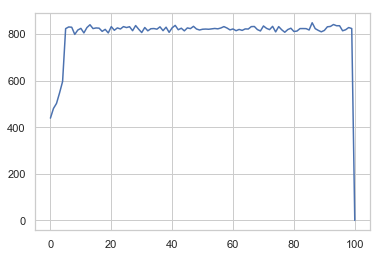

In [97]:
sns.set(style="whitegrid")
plt.plot(patience_results)
plt.show()

## Lepszy wystrój, więcej klientów, wyższa strata

In [104]:
import tqdm
decor_results = np.zeros(20)

for decor in tqdm.tqdm(range(1, len(decor_results))):
    results, _ = run_simulation(
        n_simulations=int(n_simulations/10), 
        shootout_loss=5*decor, 
        customer_lambda=(2*decor+5))
    decor_results[decor] = results.mean()





  0%|                                                                                           | 0/19 [00:00<?, ?it/s]



  5%|████▎                                                                              | 1/19 [00:14<04:14, 14.12s/it]



 11%|████████▋                                                                          | 2/19 [00:22<03:31, 12.45s/it]



 16%|█████████████                                                                      | 3/19 [00:28<02:45, 10.32s/it]



 21%|█████████████████▍                                                                 | 4/19 [00:31<02:02,  8.19s/it]



 26%|█████████████████████▊                                                             | 5/19 [00:33<01:30,  6.45s/it]



 32%|██████████████████████████▏                                                        | 6/19 [00:35<01:04,  5.00s/it]



 37%|██████████████████████████████▌                                                    | 7/19 [00:36<00:46,  3.86s/it]



 42%|███████

In [ ]:
sns.set(style="whitegrid")
plt.plot(decor_results)
plt.show()